# Web scraping and analysis



## Introduction

The project aims to collect data from (skytrax)[https://www.airlinequality.com/airline-reviews/british-airways] to create a dataset that has the reviews regarding the British Airways airline. From the dataset insight will be gathered to get the overview of the sentiment towards the airline. This can be used to come up with strategies that can be used to improve the airline and also keep doing the thigs that the passengers appreciate about the airline.


## Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import re
from textblob import TextBlob

## Loading the data

In [2]:
BA_reviews=pd.read_csv('../data/BA_reviews.csv')

The dataset has been loaded and saved in a variable called `BA_reviews`.

## Data exploration

In [3]:
BA_reviews.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | This time British Airways ...
1,1,"✅ Trip Verified | The seats were excellent, ..."
2,2,✅ Trip Verified | After the nightmare of get...
3,3,✅ Trip Verified | Prior to boarding a gate a...
4,4,✅ Trip Verified | I flew from Amsterdam to L...


The dataset contains an unnamed and reviews columns

In [4]:
BA_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3920 entries, 0 to 3919
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3920 non-null   int64 
 1   reviews     3920 non-null   object
dtypes: int64(1), object(1)
memory usage: 61.4+ KB


Both the columns have no null values present in them. There are 3920 rows and 2 columns in the dataset. The Unnamed:0 column contains numerical entries and the reviews column contains string-like entries.

In [5]:
BA_reviews.describe().round(2)

,Unnamed: 0
count,3920.00
mean,1959.50
std,1131.75
min,0.00
25%,979.75
50%,1959.50
75%,2939.25
max,3919.00


The `Unnamed: 0` column has numbers just going from zero to 2919, it does not display anything special. This column will have to be dropped.

In [6]:
BA_reviews.describe(exclude='number')

,reviews
count,3920
unique,3901
top,BA 870 22nd Dec 2014. Flew from London to Buda...
freq,2


There are 3920 reviews and there is atleast one review that has been logged twice. Duplicated reviews will have to be dropped to ensure that they do not mess up the insight gathered from  the reviews. 

## Data cleaning

In [7]:
BA_reviews.drop(columns='Unnamed: 0',inplace=True)

The `Unnamed: 0` column has been dropped as it does not provide any meaningful value to the dataset.

In [8]:
BA_reviews.drop_duplicates(inplace=True)

The duplicates have been dropped

In [9]:
BA_reviews=BA_reviews[BA_reviews['reviews'].str.contains('Trip Verified')]

Only reviews that has the text `Trip Verified` are to be kept as these are reviews that have had their legitimacy verified. This is to ensure that the company prioritizes reviews that have evidence of the use of services.

In [10]:
def clean_text(text):
    text = re.sub(r"[^\w\s]", "", text)  
    text = text.lower().strip() 
    return text


A function for removing special characters from reviews has been created, this is going to be cruicial for sentiment analysis.

In [11]:
BA_reviews['reviews']=BA_reviews['reviews'].apply(clean_text)

The function has been applied to the dataset.

In [12]:
BA_reviews.head()

,reviews
0,trip verified this time british airways man...
1,trip verified the seats were excellent with...
2,trip verified after the nightmare of gettin...
3,trip verified prior to boarding a gate agen...
4,trip verified i flew from amsterdam to las ...


The check marks and punctuation marks that were present on the dataset have been removed as they do not add value to sentiment analysis. The tect has also been converted to small letters to give all words similar value.

In [13]:
BA_reviews['reviews']=BA_reviews['reviews'].str.replace('trip verified','')
BA_reviews.head()

,reviews
0,this time british airways managed to get e...
1,the seats were excellent with a feel of mu...
2,after the nightmare of getting through tri...
3,prior to boarding a gate agent seemed to p...
4,i flew from amsterdam to las vegas with a ...


The words `trip verified` have been removed from every row as those words do not add value to the sentiment of the review.

## Data analysis

In [14]:
def get_textblob_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "positive"
    elif polarity < 0:
        return "negative"
    else:
        return "neutral"

A function for assigning polarity of sentiment has been created. It makes use of TextBlob inbuilt sentiment polarity. This can be interpreted to a category of sentiment meaningful to us.

In [15]:
BA_reviews["sentiment"] = BA_reviews["reviews"].apply(get_textblob_sentiment)

The function has been applied to the dataset to categorize the reviews accordingly.

In [16]:
BA_reviews.head()

,reviews,sentiment
0,this time british airways managed to get e...,positive
1,the seats were excellent with a feel of mu...,positive
2,after the nightmare of getting through tri...,positive
3,prior to boarding a gate agent seemed to p...,negative
4,i flew from amsterdam to las vegas with a ...,positive


The sentiments have been assigned succesfully to each review and stored in a column named `sentiment`

In [17]:
BA_reviews['sentiment'].value_counts()

sentiment
positive    835
negative    465
neutral      13
Name: count, dtype: int64

There are 3 distinct sentiments, positive, negative and neutral. Most reviews have positive reviews whilst the leat reviews are neutral.

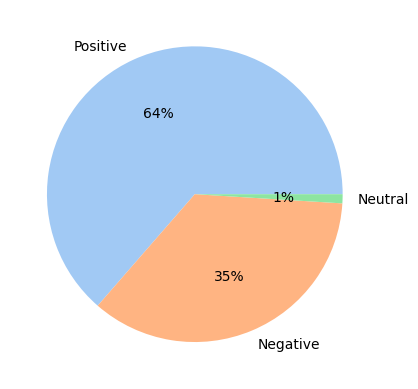

In [18]:
colors = sns.color_palette('pastel')
labels=['Positive','Negative','Neutral']
plt.pie(BA_reviews['sentiment'].value_counts(), labels=labels,colors=colors, autopct='%.0f%%')
plt.show()

This chart displays that 64% of verified passengers have a positive review for the airline and 35% of them have a negative review. THis can potentially mean that the company is looking at around 64% passenger retention for future trips.

# Conclusion

There are about 64% passengers that are feeling generally positive with the flight's services. These services can be kept up. The services that 35% of the passengers are unhappy about can be improved to ensure better retention of customers.


To improve the analysis, the data collected could also include the star ratings given by the passengers for improved model for sentiment criteria. It could also be included in the reviewing website the question asking the passengers if they would use the services of British airways airline when they travel.